LetsGrowMore Data Science Internship (VIP)

Name: Sarita Yadav

Title: Prediction using Decision Tree Algorithm

Level: Intermediate

Batch: April

Step 1: Data Collection

Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

Reading dataset

In [ ]:
df = pd.read_csv("/content/IRIS (1).csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Step 2: Understanding the Data

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
df.shape

(150, 5)

Step 3: Checking Nulls

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Step 4: Data Visualization

Heatmap

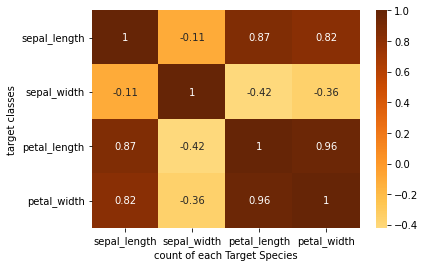

In [ ]:
sns.heatmap(df.corr(), annot = True, center = 0)
plt.ylabel('target classes')
plt.xlabel('count of each Target Species')
plt.show()

Step 5: Data Transformation

As we know machine learning not accept the categorical value so that we are transforming values with label encoder

In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species']= le.fit_transform(df['species'])
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X = df.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = df.iloc[:,-1:]
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


Step 6: Model Building

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(105, 4)

In [ ]:
y_train.shape

(105, 1)

Here we are using DecisionTreeClassifier to predict our data After that fitting/training the model on X_train and Y_train using .fit() method.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

Then we are predicting on X_test using .predict() method. And checking accuracy how are model is accurate or how it is properly worikng on dat

In [ ]:
from sklearn.metrics import accuracy_score
prediction = dt.predict(X_test)
print("Accuracy:",accuracy_score(y_test,prediction))

Accuracy: 0.9777777777777777


In [ ]:
from sklearn.metrics import classification_report
print("Report:",classification_report(y_test,prediction))

Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



For this model, the accuracy on the test set is 0.97, which means the model made the right prediction for 97% of the irises in the given dataset. We can expect the model to be correct 97% of the time for predicting the species of new irises.

In [ ]:
clsVars = "species"
allCols = df.columns
print(clsVars)
# counts
print("\n*** Counts ***")
print(df.groupby(df[clsVars]).size())

species

*** Counts ***
species
0    50
1    50
2    50
dtype: int64


In [ ]:
from sklearn import tree
text_tree = tree.export_text(dt)
print("\n*** Decision Tree Text ***")
print(text_tree)


*** Decision Tree Text ***
|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



Decision Tree

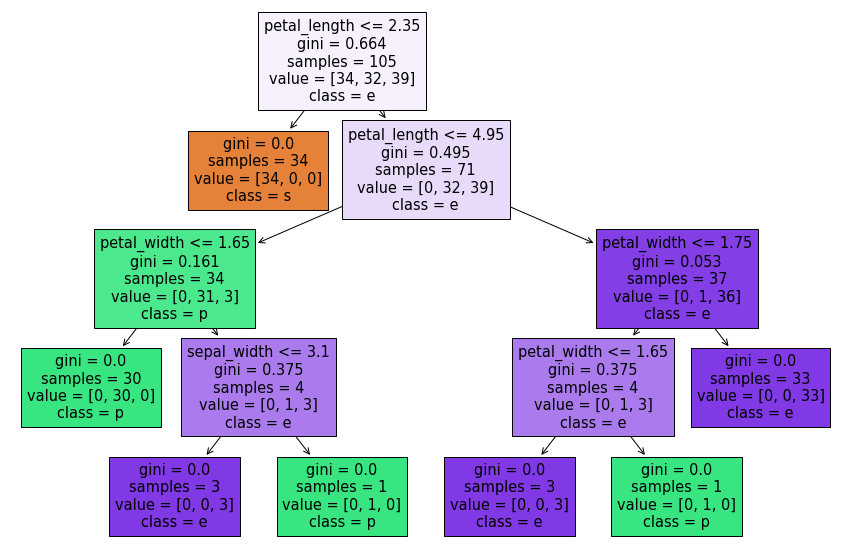

In [ ]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dt, 
                feature_names=allCols,  
                class_names=clsVars,
                filled=True)
plt.show()